In [1]:
import numpy as np
# from qiskit import QuantumCircuit, Aer, transpile, assemble
# from qiskit import *
# from qiskit.visualization import plot_histogram
from math import gcd, sqrt, pi, trunc, exp, sinh, log, sqrt
# from numpy.random import randint
# import pandas as pd
# from scipy.linalg import expm, sinm, cosm
from fractions import Fraction as frac
from numpy import linalg as LA
# from qutip import *
from scipy.linalg import norm
# from sympy import I, Matrix, symbols
# from sympy.physics.quantum import TensorProduct
import time
# from datetime import datetime
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import random
import pickle
from matplotlib.ticker import FuncFormatter
import os

In [20]:
def Log_Setting(ax):
    for axis in [ax.xaxis, ax.yaxis]:
        axis.set_major_formatter(FuncFormatter(lambda y, _: '{:.16g}'.format(y)))

def Size_Print(Dimension, Size):
    str = f"L={Size} (Size={Size}"    
    for i in range(Dimension - 1):
        str += f"x{Size}"    
    str += ")"

    # return str
    return f"L={Size}"

LOCATION = '/mnt/d/SNU/Research/potts/fig/'

In [21]:
file = open(os.path.join('/mnt/d/SNU/Research/potts/data/', 'data potts (normal).txt'), "r")

lines = file.readlines()
Irreducible_State = []
Irreducible_Dimension = []
Irreducible_Size = []

for x in lines:
    if(int(x.split(' ')[0]) not in Irreducible_State):
        Irreducible_State.append(int(x.split(' ')[0]))

    if(int(x.split(' ')[1]) not in Irreducible_Dimension):
        Irreducible_Dimension.append(int(x.split(' ')[1]))
    
    if(int(x.split(' ')[2]) not in Irreducible_Size):
        Irreducible_Size.append(int(x.split(' ')[2]))

Irreducible_State = sorted(Irreducible_State)
Irreducible_Dimension = sorted(Irreducible_Dimension)
Irreducible_Size = sorted(Irreducible_Size)

N_State = np.size(Irreducible_State)
N_Dimension = np.size(Irreducible_Dimension)
N_Size = np.size(Irreducible_Size)

temp_T, temp_T_Data = [[[[] for i in range(N_Size)] for i in range(N_Dimension)] for i in range(N_State)], [[[[[] for i in range(5)] for i in range(N_Size)] for i in range(N_Dimension)] for i in range(N_State)]
temp_H, temp_H_Data = [[[[] for i in range(N_Size)] for i in range(N_Dimension)] for i in range(N_State)], [[[[] for i in range(N_Size)] for i in range(N_Dimension)] for i in range(N_State)]

T, T_Data = [[[[] for i in range(N_Size)] for i in range(N_Dimension)] for i in range(N_State)], [[[[[] for i in range(5)] for i in range(N_Size)] for i in range(N_Dimension)] for i in range(N_State)]
H, H_Data = [[[[] for i in range(N_Size)] for i in range(N_Dimension)] for i in range(N_State)], [[[[] for i in range(N_Size)] for i in range(N_Dimension)] for i in range(N_State)]

for x in lines:
    i = Irreducible_State.index(int(x.split(' ')[0]))
    j = Irreducible_Dimension.index(int(x.split(' ')[1]))
    k = Irreducible_Size.index(int(x.split(' ')[2]))

    Tc = 1.005

    if(float(x.split(' ')[8]) == 0):
        temp_T[i][j][k].append(float(x.split(' ')[7]))
        
        for m in range(5):
            temp_T_Data[i][j][k][m].append(float(x.split(' ')[9 + m]))

    if(float(x.split(' ')[7]) == Tc):
        temp_H[i][j][k].append(float(x.split(' ')[8]))
        temp_H_Data[i][j][k].append(float(x.split(' ')[9]))

file.close()

In [22]:
for i in range(N_State):
    for j in range(N_Dimension):
        for k in range(N_Size):
            if(np.size(temp_T[i][j][k] != 0)):
                real_T = []

                for m in range(np.size(temp_T[i][j][k])):
                    if(temp_T[i][j][k][m] not in real_T):
                        real_T.append(temp_T[i][j][k][m])
                
                real_T_Data = [[[] for i in range(np.size(real_T))] for i in range(5)]

                for m in range(5):
                    for n in range(np.size(temp_T[i][j][k])):
                        real_T_Data[m][real_T.index(temp_T[i][j][k][n])].append(temp_T_Data[i][j][k][m][n])

                for m in range(5):
                    for n in range(np.size(real_T)):
                        real_T_Data[m][n] = np.average(real_T_Data[m][n])

                real_H = []

                for m in range(np.size(temp_H[i][j][k])):
                    if(temp_H[i][j][k][m] not in real_H):
                        real_H.append(temp_H[i][j][k][m])
                
                real_H_Data = [[] for i in range(np.size(real_H))]

                for m in range(np.size(temp_H[i][j][k])):
                    real_H_Data[real_H.index(temp_H[i][j][k][m])].append(temp_H_Data[i][j][k][m])
                
                for m in range(np.size(real_H)):
                    real_H_Data[m] = np.average(real_H_Data[m])

                temp1 = np.vstack([real_T, real_T_Data[0], real_T_Data[1], real_T_Data[2], real_T_Data[3], real_T_Data[4]])
                temp2 = np.vstack([real_H, real_H_Data])

                temp1_1 = temp1 [ :, temp1[0].argsort()]
                temp2_1 = temp2 [ :, temp2[0].argsort()]

                T[i][j][k] = temp1_1[0]
                
                for m in range(5):
                    T_Data[i][j][k][m] = temp1_1[m + 1]

                H[i][j][k] = temp2_1[0]
                H_Data[i][j][k] = temp2_1[1]

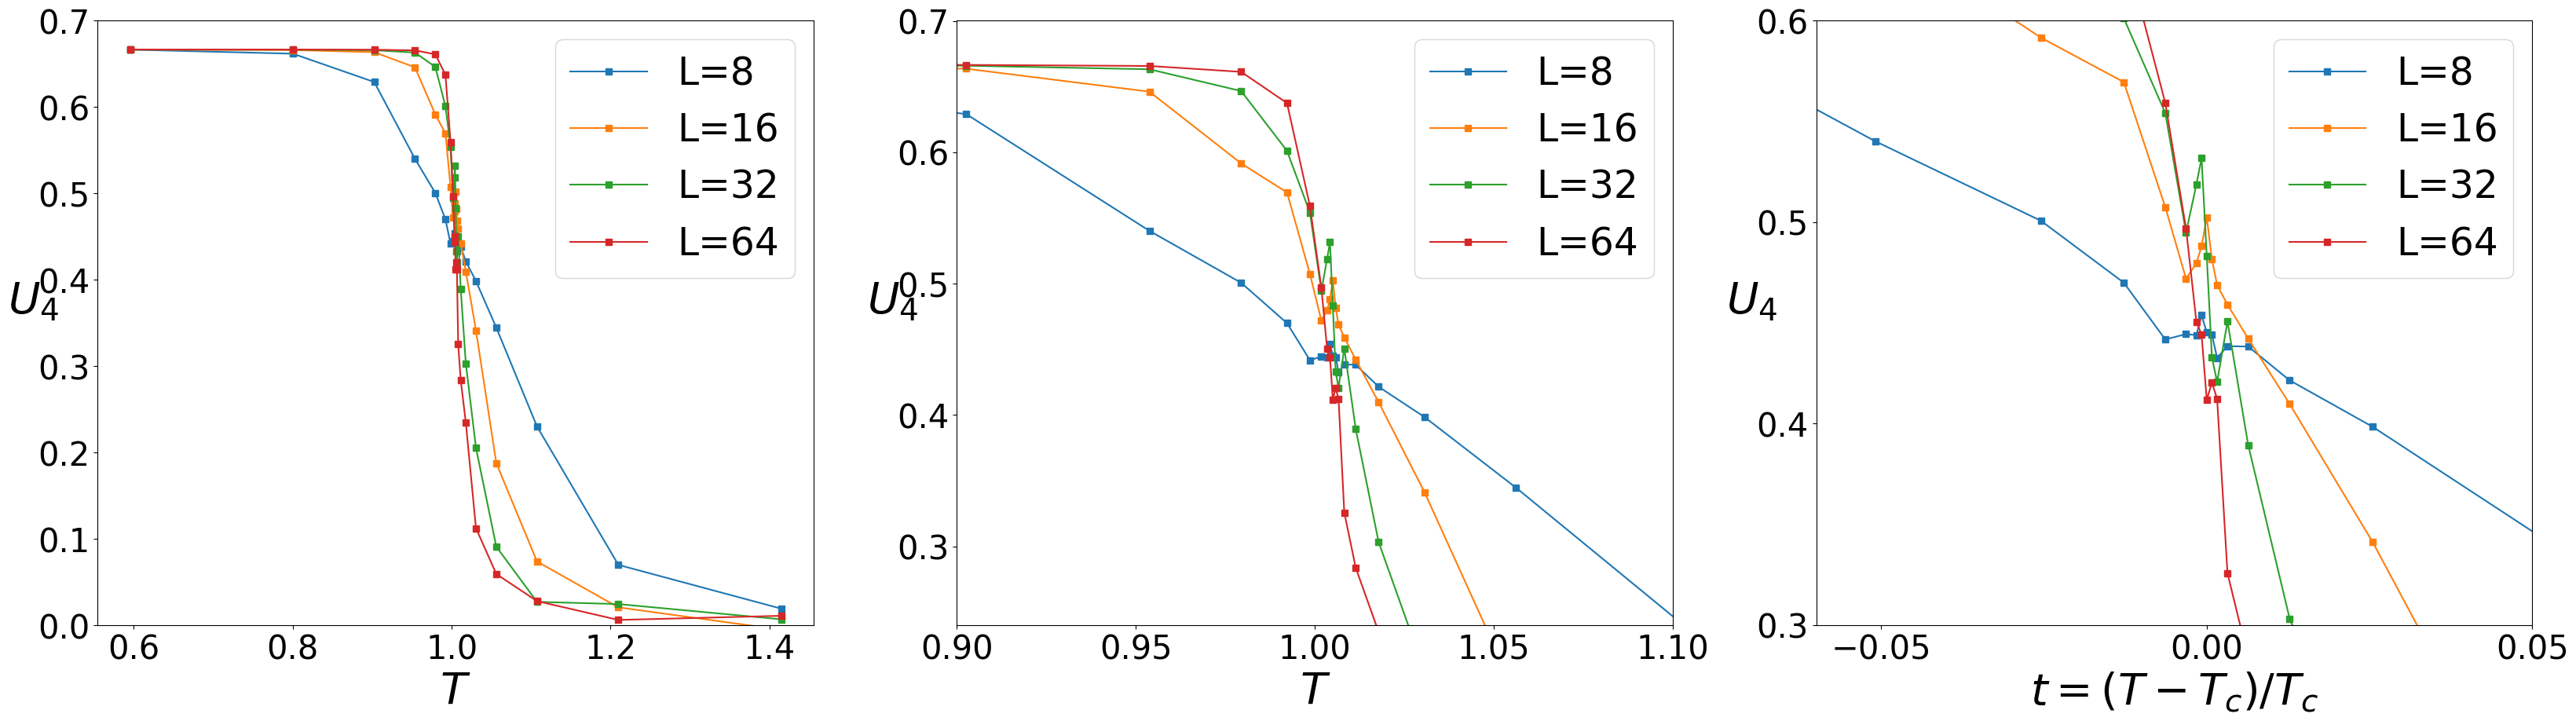

In [62]:
nrows = 1
ncols = 3

fig, ax = plt.subplots(nrows, ncols, figsize = (40, 10))

State = 3
Dimension = 2
q = Irreducible_State.index(State)
D = Irreducible_Dimension.index(Dimension)

for i in range(N_Size):
    Size = Irreducible_Size[i]

    if(np.size(T[q][D][i]) != 0):
        Binder = T_Data[q][D][i][2]
        
        ax[0].plot(T[q][D][i], Binder, 's-', label = Size_Print(Dimension, Size))
        ax[1].plot(T[q][D][i], Binder, 's-', label = Size_Print(Dimension, Size))
        ax[2].plot((T[q][D][i] - Tc) / Tc, Binder, 's-', label = Size_Print(Dimension, Size))

ax[0].set_xlabel("$T$", fontsize = 40)
ax[0].set_ylabel("$U_{4}$", fontsize = 40, rotation = 0)

ax[0].axis([None, None, 0, None])

ax[1].set_xlabel("$T$", fontsize = 40)
ax[1].set_ylabel("$U_{4}$", fontsize = 40, rotation = 0)

ax[1].axis([0.9, 1.1, 0.24, None])
#ax[1].set_xticks(np.arange(-0.1, 0.1 + 0.01, 0.05))

ax[2].set_xlabel("$t = (T - T_{c}) / T_{c}$", fontsize = 40)
ax[2].set_ylabel("$U_{4}$", fontsize = 40, rotation = 0)

ax[2].axis([-0.06, 0.05, 0.3, 0.6])
ax[2].set_xticks(np.arange(-0.05, 0.05 + 0.01, 0.05))
ax[2].set_yticks(np.arange(0.30, 0.60 + 0.01, 0.1))

for i in range(ncols):
    # ax[i].set_title(f"Binder Cumulant ({State}-state {Dimension}D Potts)", fontsize = 30)

    ax[i].tick_params(axis = 'both', labelsize = 30)

    # ax.set_xticks(np.arange(1.2, 1.6 + 0.01, 0.05))
    # ax.set_yticks(np.arange(0.52, 0.7 + 0.01, 0.04))

    # ax.axis([1.41, 1.55, 0.55, 0.69])

    ax[i].legend(fontsize=35,loc='best')

fig.savefig(os.path.join(LOCATION, f'Binder Cumulant ({State}-state {Dimension}D Potts).jpg'))

plt.show()

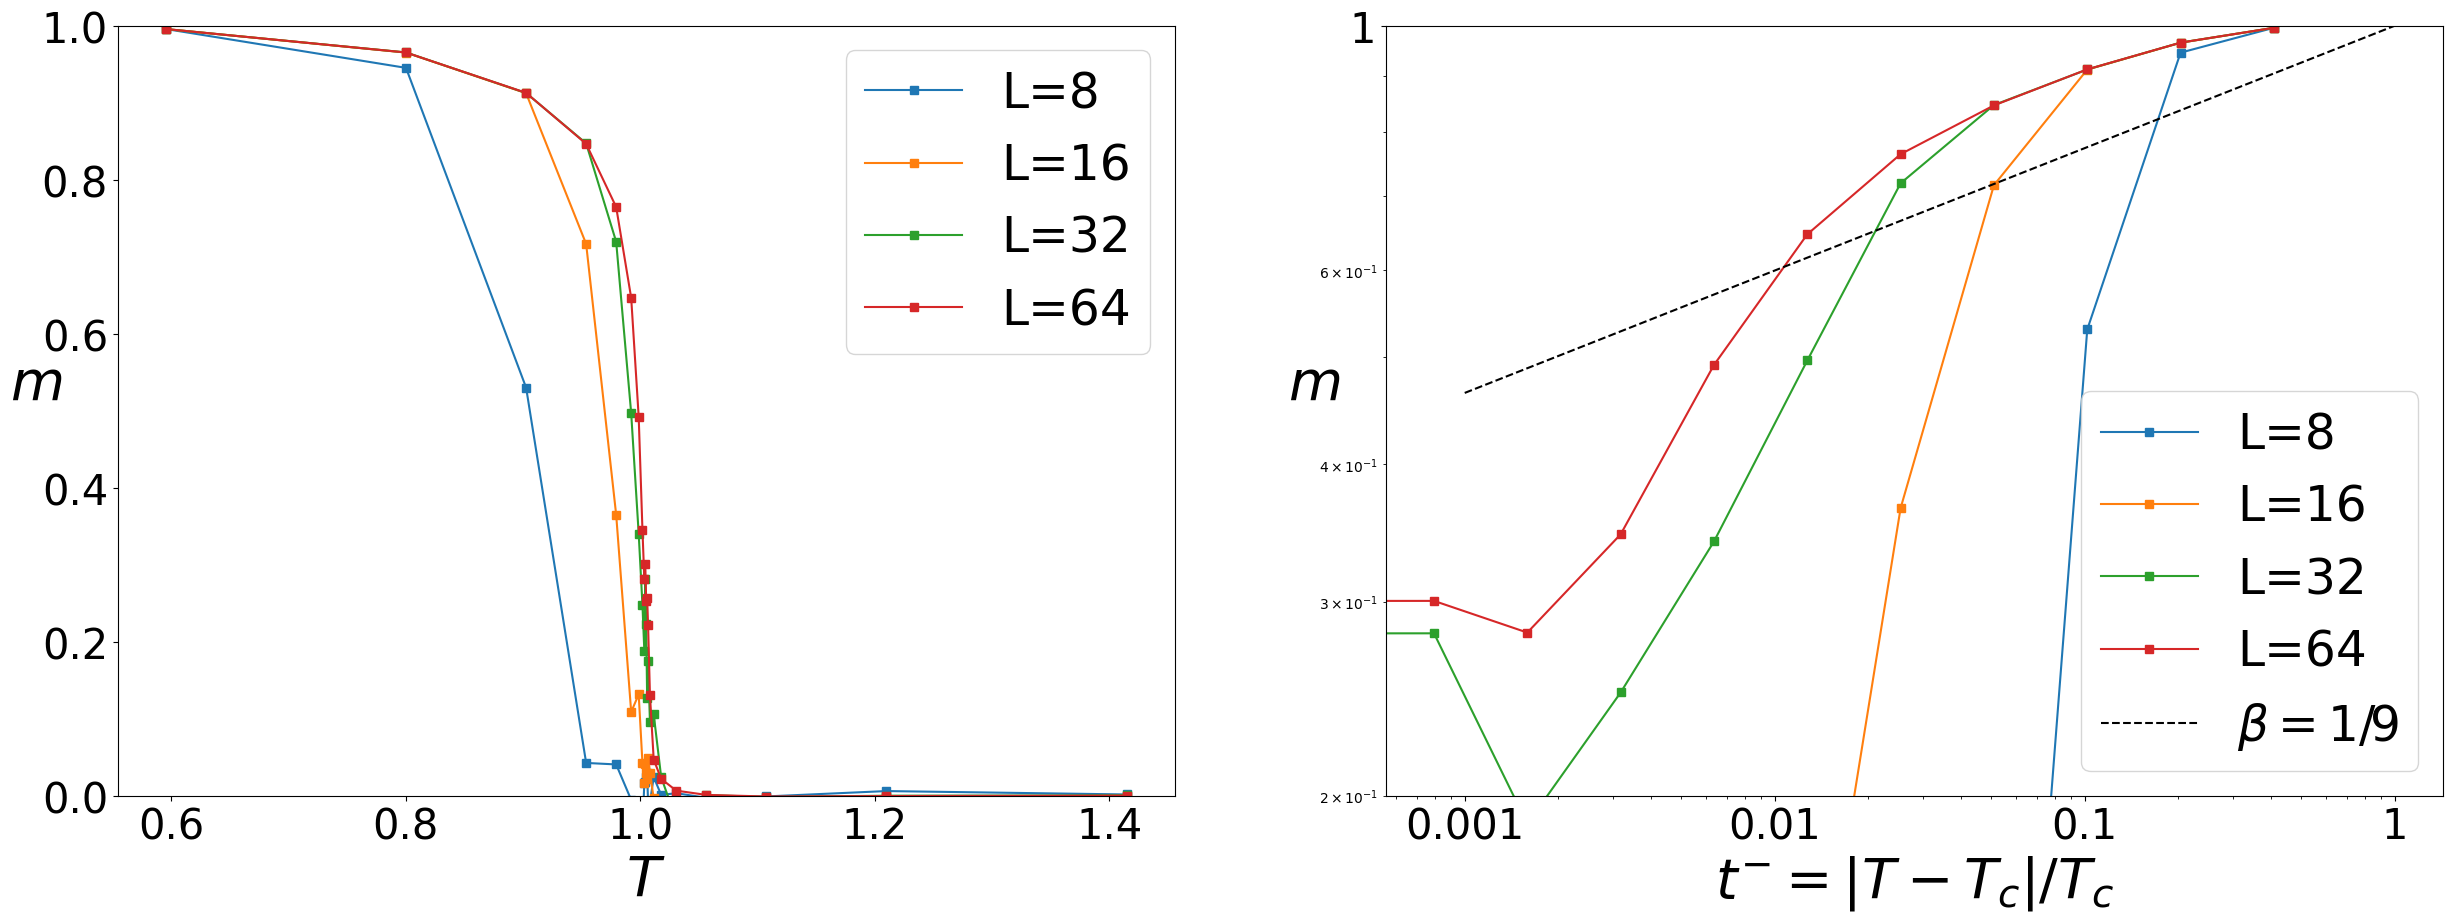

In [63]:
nrows = 1
ncols = 2

Beta = frac(1 / 9).limit_denominator(10)

fig, ax = plt.subplots(nrows, ncols, figsize = (30, 10))

def g(x):
    return pow(x, Beta)

State = 3
Dimension = 2
q = Irreducible_State.index(State)
D = Irreducible_Dimension.index(Dimension)

for i in range(N_Size):
    Size = Irreducible_Size[i]

    if(np.size(T[q][D][i]) != 0):
        ax[0].plot(T[q][D][i], T_Data[q][D][i][0], 's-', label = Size_Print(Dimension, Size))
        ax[1].plot((Tc - T[q][D][i]) / Tc, T_Data[q][D][i][0], 's-', label = Size_Print(Dimension, Size))

x = np.linspace(0.001, 1, 1000)
y = np.vectorize(g)
ax[1].plot(x, y(x),'k--', label = fr'$\beta = {Beta}$')

for i in range(ncols):
    # ax[i].set_title(f"Order Parameter ({State}-state {Dimension}D Potts)", fontsize = 40)

    ax[i].tick_params(axis = 'both', labelsize = 30)

    ax[i].legend(fontsize=35,loc='best')

ax[0].axis([None, None, 0, 1])

ax[0].set_xlabel("$T$",fontsize=40)
ax[0].set_ylabel("$m$",fontsize=40, rotation=0)

ax[1].set_xlabel("$t^{-} = |T-T_{c}| / T_{c}$",fontsize=40)
ax[1].set_ylabel("$m$",fontsize=40, rotation=0)

ax[1].loglog()
Log_Setting(ax[1])
ax[1].axis([None, None, 0.2, 1])

fig.savefig(os.path.join(LOCATION, f'Beta, Order Parameter ({State}-state {Dimension}D Potts).jpg'))

plt.show()

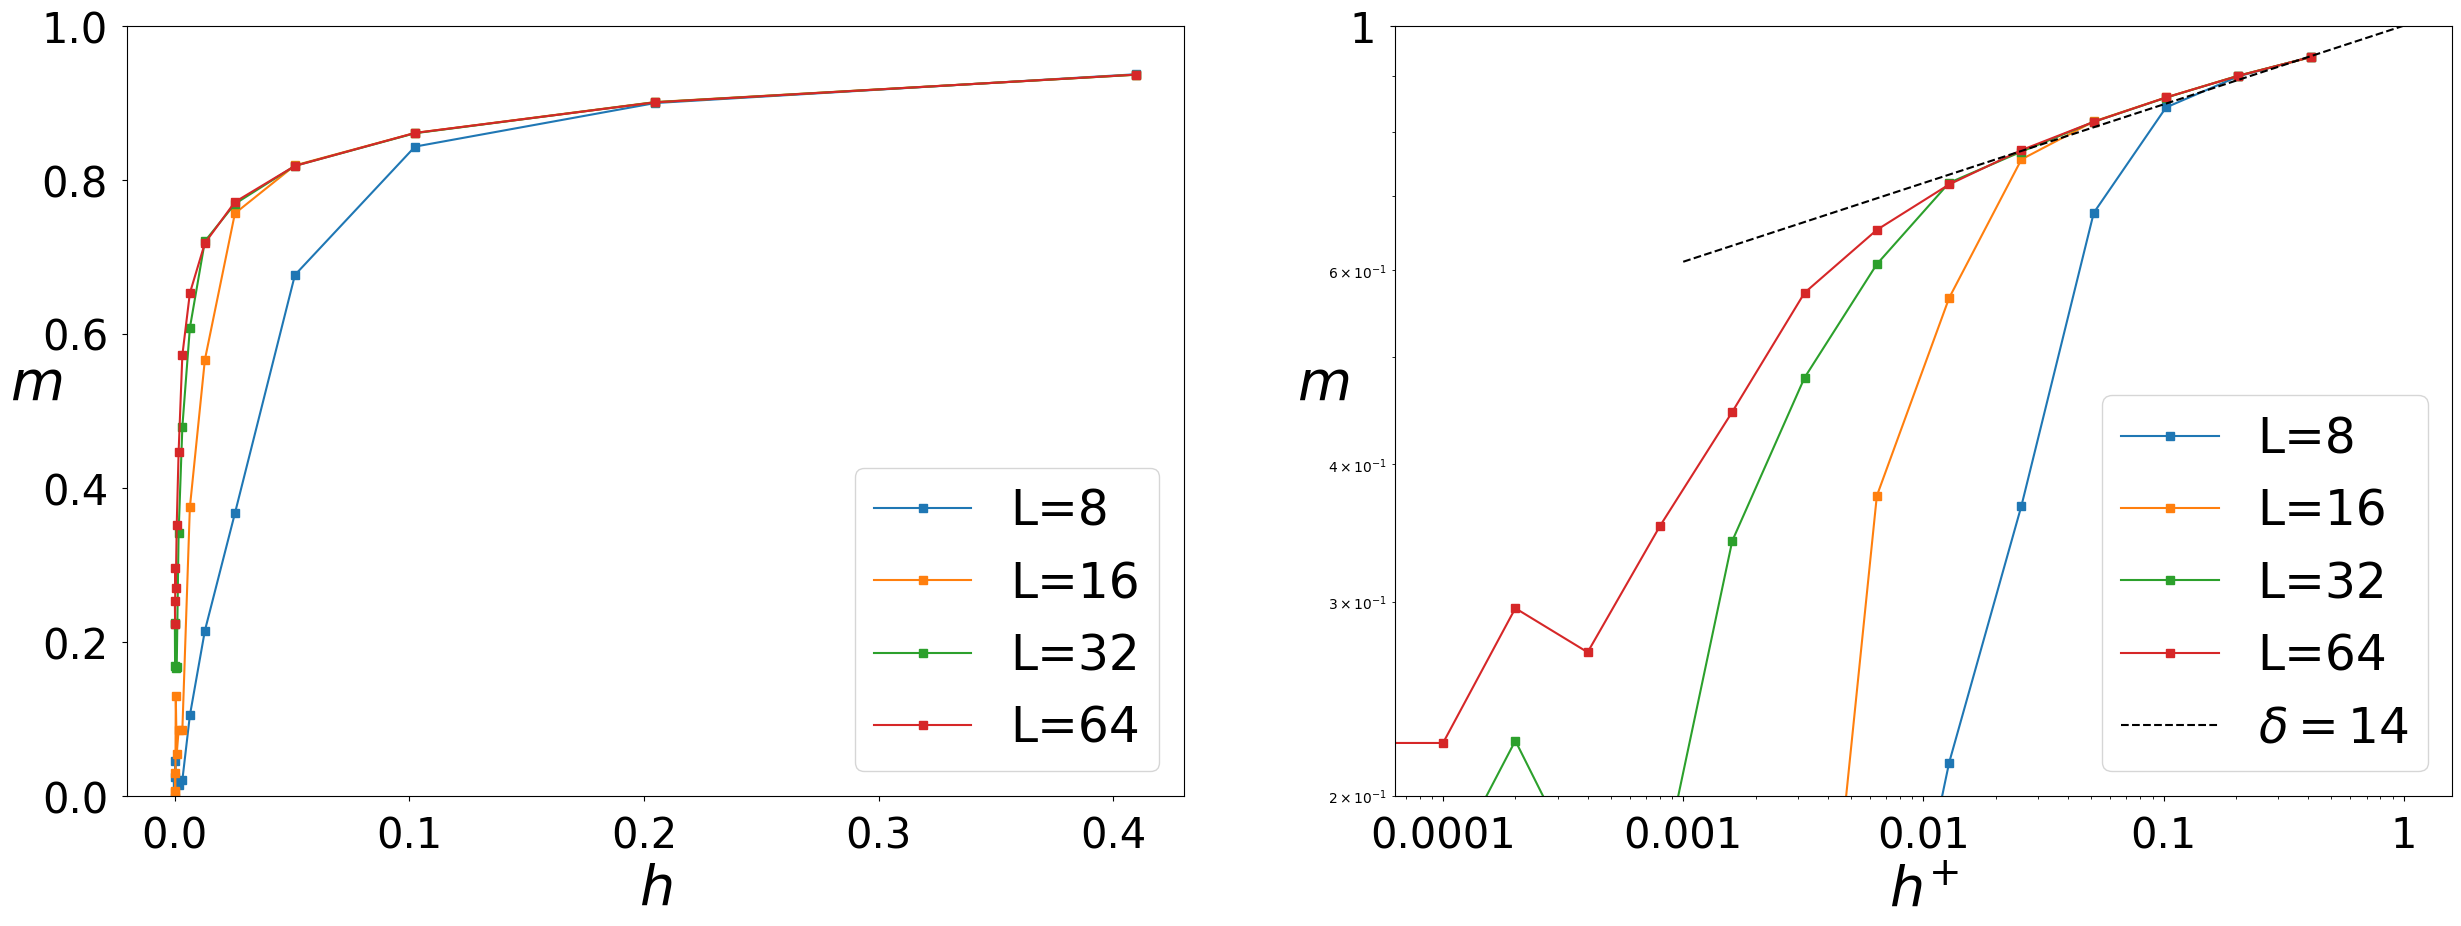

In [64]:
nrows = 1
ncols = 2

Delta = frac(14).limit_denominator(1)

fig, ax = plt.subplots(nrows, ncols, figsize = (30, 10))

def g(x):
    return pow(x, 1 / Delta)

State = 3
Dimension = 2
q = Irreducible_State.index(State)
D = Irreducible_Dimension.index(Dimension)

for i in range(N_Size):
    Size = Irreducible_Size[i]

    if(np.size(H[q][D][i]) != 0):
        ax[0].plot(H[q][D][i], H_Data[q][D][i], 's-', label = Size_Print(Dimension, Size))
        ax[1].plot(H[q][D][i], H_Data[q][D][i], 's-', label = Size_Print(Dimension, Size))

x = np.linspace(0.001, 1, 1000)
y = np.vectorize(g)
ax[1].plot(x, y(x),'k--', label = fr'$\delta = {Delta}$')

for i in range(ncols):
    # ax[i].set_title(f"Order Parameter ({State}-state {Dimension}D Potts)", fontsize = 40)

    ax[i].tick_params(axis = 'both', labelsize = 30, pad = 10)

    ax[i].legend(fontsize=35,loc='best')

ax[0].axis([None, None, 0, 1])

ax[0].set_xlabel("$h$",fontsize=40)
ax[0].set_ylabel("$m$",fontsize=40, rotation=0)

ax[1].set_xlabel("$h^{+}$",fontsize=40)
ax[1].set_ylabel("$m$",fontsize=40, rotation=0)

ax[1].loglog()
Log_Setting(ax[1])
ax[1].axis([None, None, 0.2, 1])

fig.savefig(os.path.join(LOCATION, f'Delta, Order Parameter ({State}-state {Dimension}D Potts).jpg'))

plt.show()

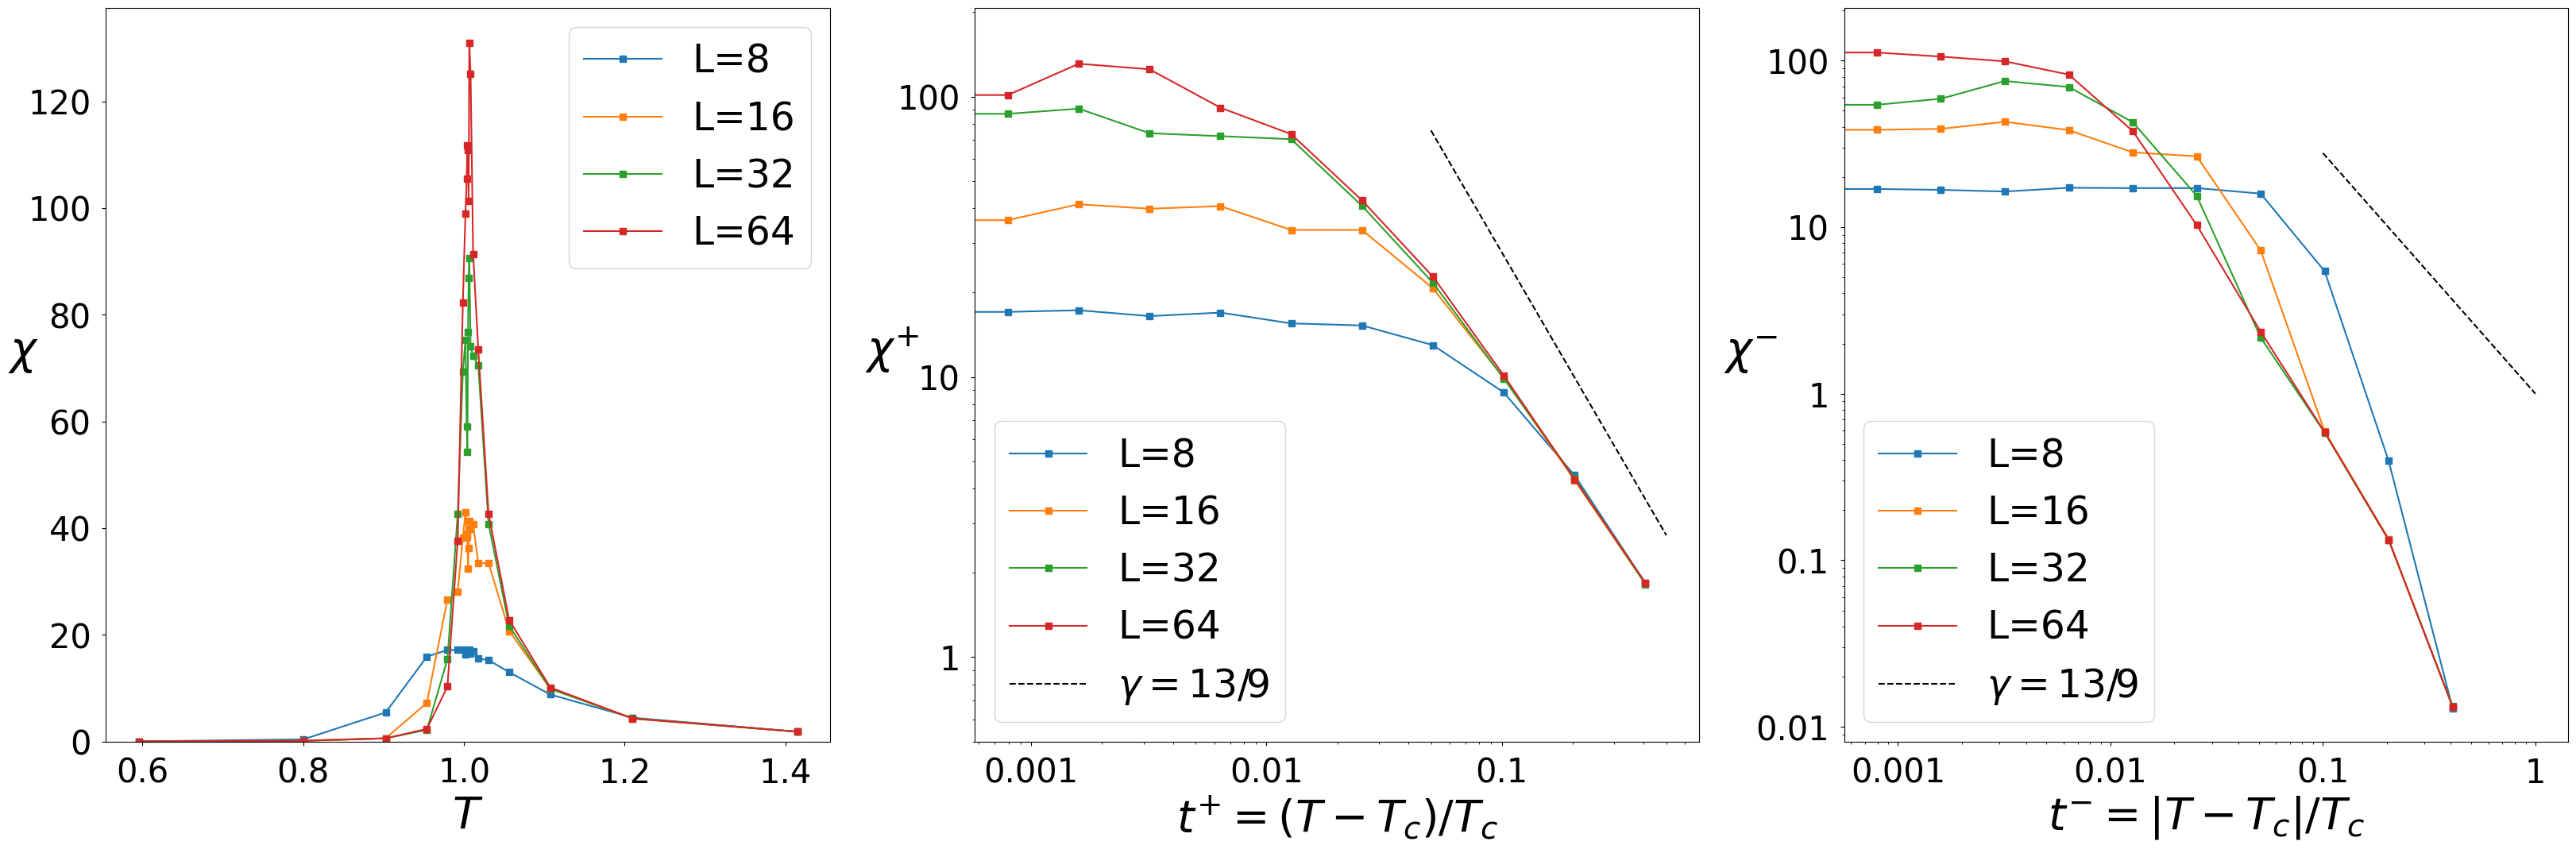

In [65]:
nrows = 1
ncols = 3

Gamma = frac(13 / 9).limit_denominator(10)

fig, ax = plt.subplots(nrows, ncols, figsize = (40, 12))

def g(x):
    return pow(x, - Gamma)

State = 3
Dimension = 2
q = Irreducible_State.index(State)
D = Irreducible_Dimension.index(Dimension)

for i in range(N_Size):
    Size = Irreducible_Size[i]

    if(np.size(T[q][D][i]) != 0):
        ax[0].plot(T[q][D][i], T_Data[q][D][i][1] * pow(Size, Dimension) / T[q][D][i], 's-', label = Size_Print(Dimension, Size))
        ax[1].plot((T[q][D][i] - Tc) / Tc, T_Data[q][D][i][1] * pow(Size, Dimension) / T[q][D][i], 's-', label = Size_Print(Dimension, Size))
        ax[2].plot((Tc - T[q][D][i]) / Tc, T_Data[q][D][i][1] * pow(Size, Dimension) / T[q][D][i], 's-', label = Size_Print(Dimension, Size))

x = np.linspace(0.05, 0.5, 1000)
y = np.vectorize(g)
ax[1].plot(x, y(x),'k--', label = fr'$\gamma = {Gamma}$')

x = np.linspace(0.1, 1, 1000)
y = np.vectorize(g)
ax[2].plot(x, y(x),'k--', label = fr'$\gamma = {Gamma}$')

for i in range(ncols):
    # ax[i].set_title(f"Susceptibility ({State}-state {Dimension}D Potts)", fontsize = 40)

    ax[i].tick_params(axis = 'both', labelsize = 30, pad = 10)

    ax[i].legend(fontsize=35,loc='best')

ax[0].set_xlabel("$T$",fontsize=40)
ax[0].set_ylabel("$\chi$",fontsize=40, rotation=0)

# ax[0].set_xticks(np.arange(1.4, 3.0 + 0.01, 0.2))
# ax[0].set_yticks(np.arange(0, 300 + 0.01, 50))

ax[0].axis([None, None, 0, None])

ax[1].set_xlabel("$t^{+} = (T-T_{c}) / T_{c}$",fontsize=40)
ax[1].set_ylabel("$\chi^{+}$",fontsize=40, rotation=0)

ax[2].set_xlabel("$t^{-} = |T-T_{c}| / T_{c}$",fontsize=40)
ax[2].set_ylabel("$\chi^{-}$",fontsize=40, rotation=0)

ax[1].loglog()
ax[2].loglog()

Log_Setting(ax[1])
Log_Setting(ax[2])

ax[1].axis([None, None, 0.5, None])
ax[2].axis([None, None, None, None])

fig.savefig(os.path.join(LOCATION, f'Gamma, Susceptibility ({State}-state {Dimension}D Potts).jpg'))

plt.show()

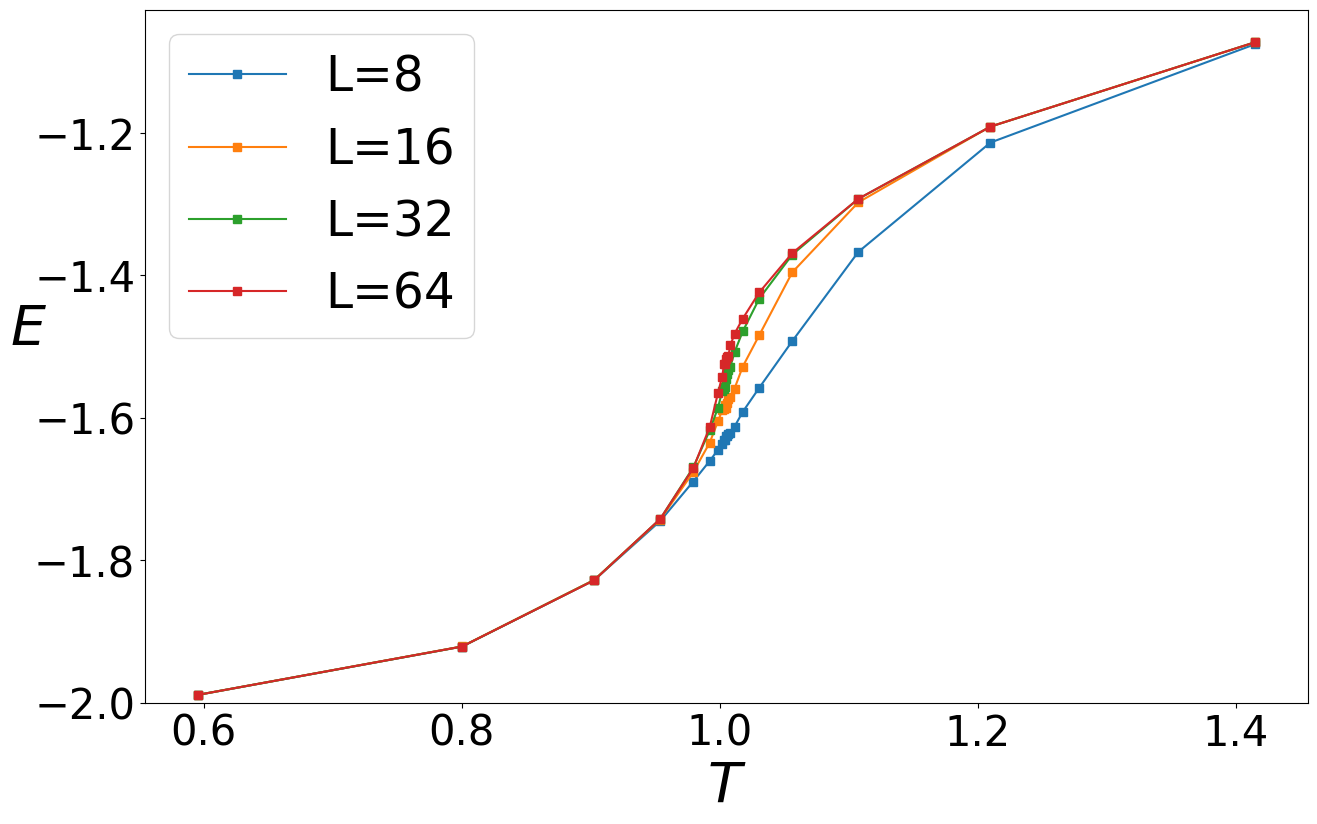

In [66]:
fig, ax = plt.subplots(figsize = (15, 9))

State = 3
Dimension = 2
q = Irreducible_State.index(State)
D = Irreducible_Dimension.index(Dimension)

for i in range(N_Size):
    Size = Irreducible_Size[i]

    if(np.size(T[q][D][i]) != 0):
        ax.plot(T[q][D][i], T_Data[q][D][i][3], 's-', label = Size_Print(Dimension, Size))

# ax.set_title(f"Energy ({State}-state {Dimension}D Potts)", fontsize = 40)

ax.set_xlabel("$T$",fontsize=40)
ax.set_ylabel("$E$",fontsize=40, rotation=0)

ax.tick_params(axis = 'both', labelsize = 30)

# ax.set_xticks(np.arange(1.4, 3.0 + 0.01, 0.2))
# ax.set_yticks(np.arange(-2, -1 + 0.01, 0.5))

ax.axis([None, None, -2, None])

ax.legend(fontsize=35,loc='best')

fig.savefig(os.path.join(LOCATION, f'Energy ({State}-state {Dimension}D Potts).jpg'))

plt.show()

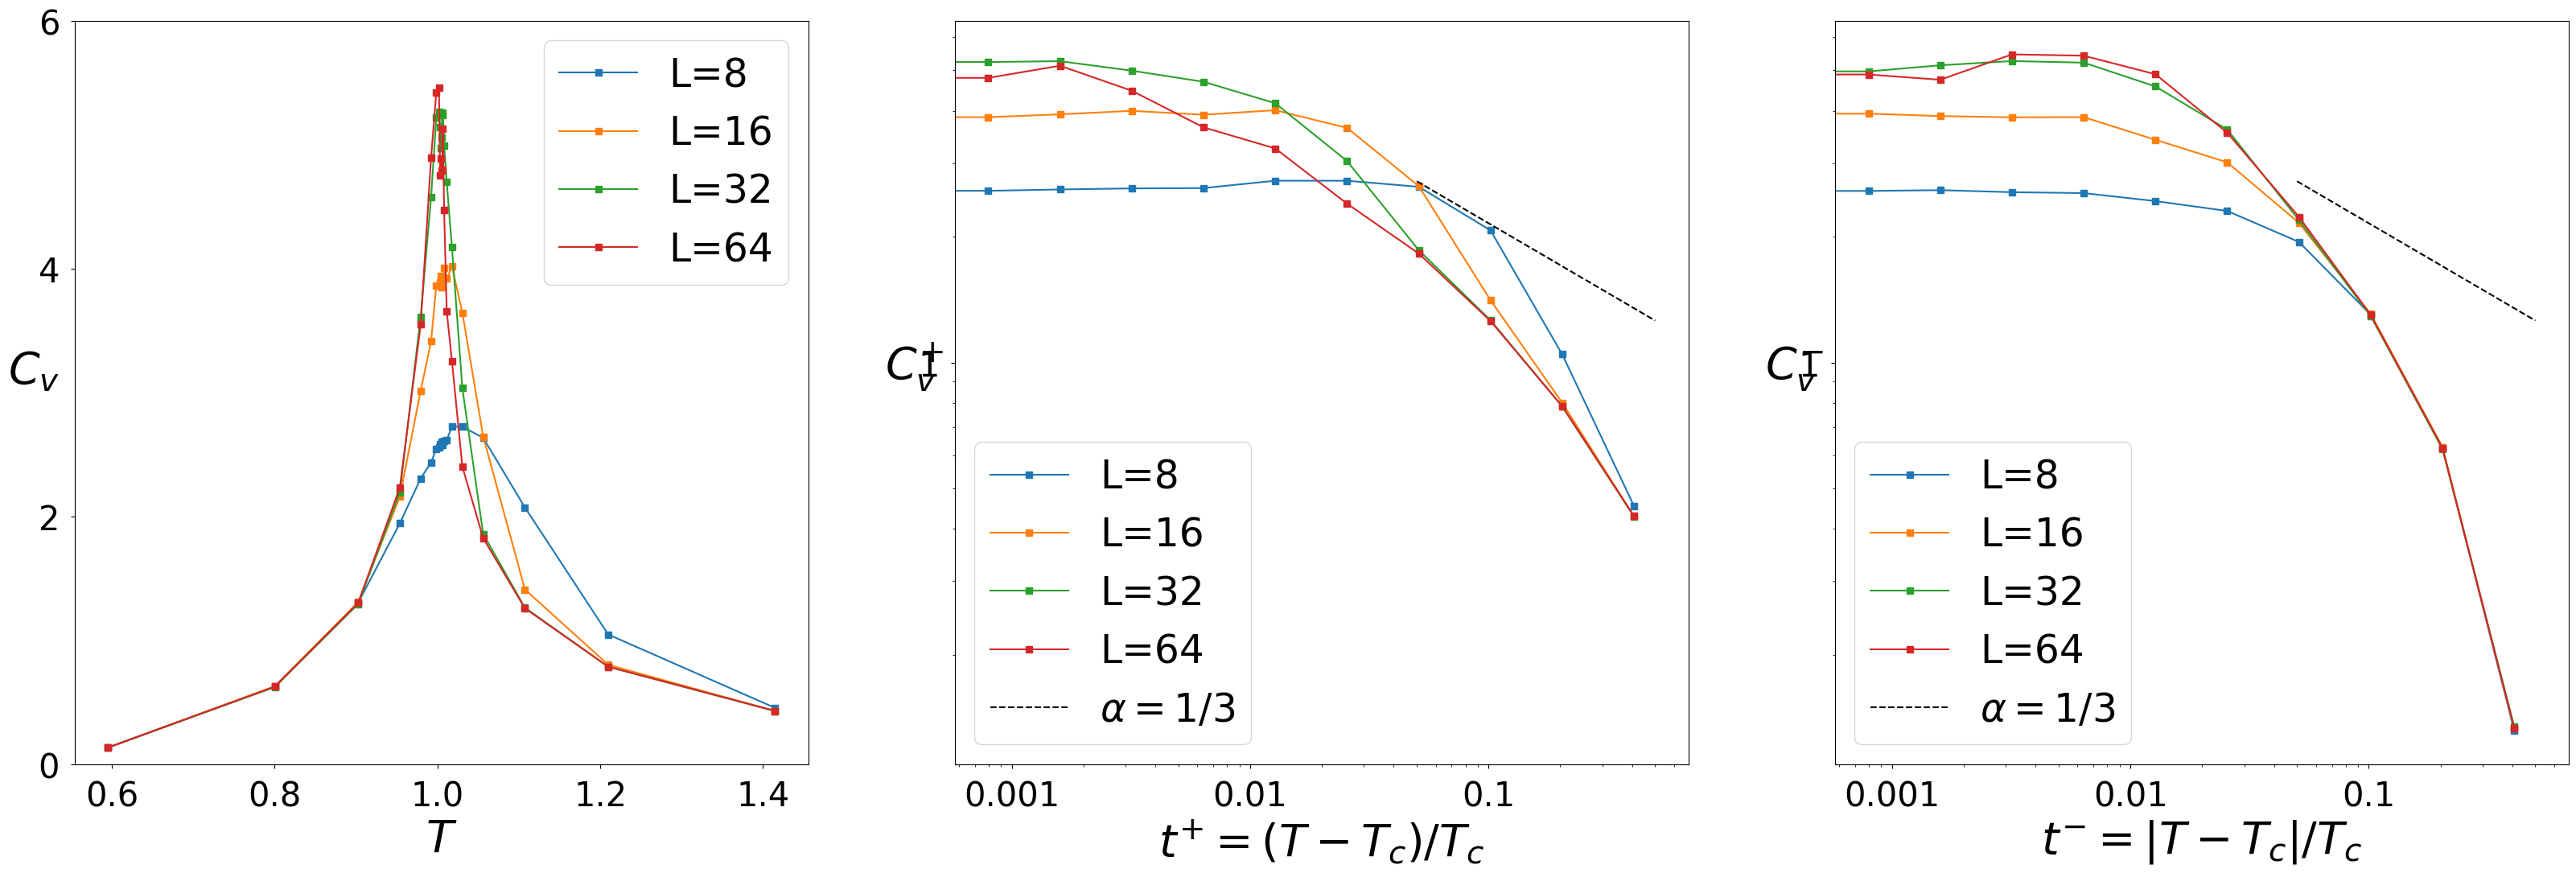

In [67]:
nrows = 1
ncols = 3
Alpha = frac(1 / 3).limit_denominator(10)

fig, ax = plt.subplots(nrows, ncols, figsize = (40, 12))

def g(x):
    return pow(x, - Alpha)

State = 3
Dimension = 2
q = Irreducible_State.index(State)
D = Irreducible_Dimension.index(Dimension)

for i in range(N_Size):
    Size = Irreducible_Size[i]

    if(np.size(T[q][D][i]) != 0):
        ax[0].plot(T[q][D][i], T_Data[q][D][i][4] * pow(Size, Dimension) / pow(T[q][D][i], 2), 's-', label = Size_Print(Dimension, Size))
        ax[1].plot((T[q][D][i] - Tc) / Tc, T_Data[q][D][i][4] * pow(Size, Dimension) / pow(T[q][D][i], 2), 's-', label = Size_Print(Dimension, Size))
        ax[2].plot((Tc - T[q][D][i]) / Tc, T_Data[q][D][i][4] * pow(Size, Dimension) / pow(T[q][D][i], 2), 's-', label = Size_Print(Dimension, Size))

x = np.linspace(0.05, 0.5, 1000)
y = np.vectorize(g)
ax[1].plot(x, y(x),'k--', label = fr'$\alpha = {Alpha}$')

x = np.linspace(0.05, 0.5, 1000)
y = np.vectorize(g)
ax[2].plot(x, y(x),'k--', label = fr'$\alpha = {Alpha}$')

for i in range(ncols):
    # ax[i].set_title(f"Specific Heat ({State}-state {Dimension}D Potts)", fontsize = 40)

    ax[i].tick_params(axis = 'both', labelsize = 30, pad = 10)

    ax[i].legend(fontsize = 35, loc='best')

ax[0].set_xlabel("$T$",fontsize=40)
ax[0].set_ylabel("$C_{v}$",fontsize = 40, rotation = 0)

# ax[0].set_xticks(np.arange(1.4, 3.0 + 0.01, 0.2))
ax[0].set_yticks(np.arange(0, 6 + 0.01, 2))

ax[0].axis([None, None, 0, None])

ax[1].set_xlabel("$t^{+} = (T-T_{c}) / T_{c}$",fontsize = 40)
ax[1].set_ylabel("$C_{v}^{+}$",fontsize = 40, rotation = 0)

ax[2].set_xlabel("$t^{-} = |T-T_{c}| / T_{c}$",fontsize = 40)
ax[2].set_ylabel("$C_{v}^{-}$",fontsize = 40, rotation = 0)

ax[1].loglog()
ax[2].loglog()

Log_Setting(ax[1])
Log_Setting(ax[2])

ax[1].axis([None, None, None, None])
ax[2].axis([None, None, None, None])

fig.savefig(os.path.join(LOCATION, f'Alpha, Specific Heat ({State}-state {Dimension}D Potts).jpg'))

plt.show()

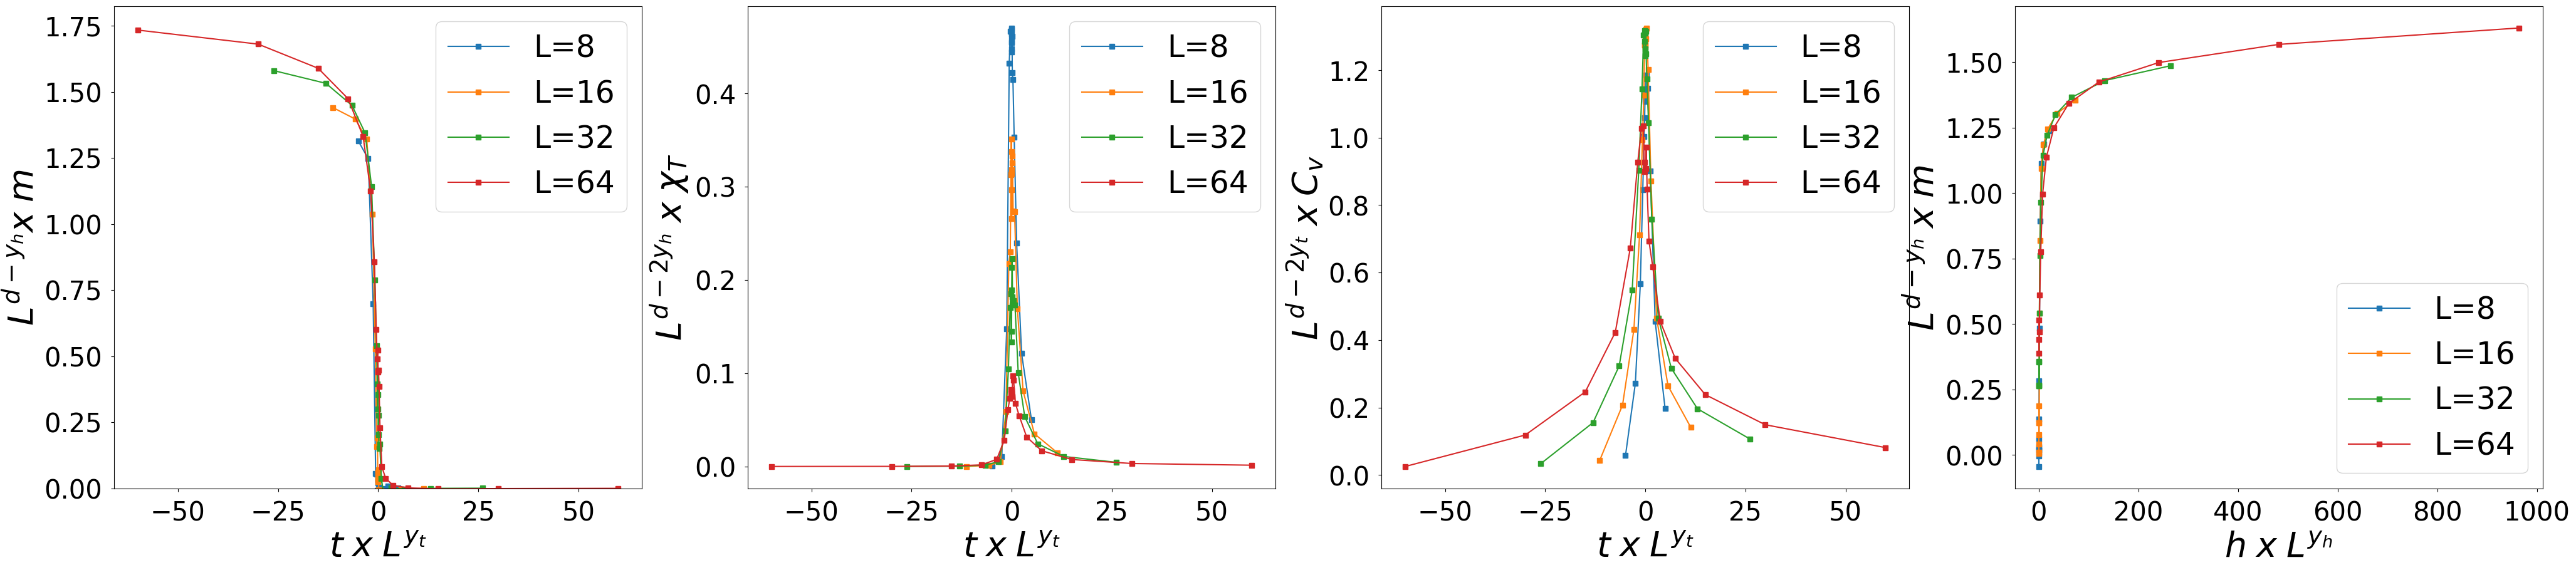

In [68]:
nrows = 1
ncols = 4
yt = frac(6 / 5).limit_denominator(10)
yh = frac(28 / 15).limit_denominator(20)

fig, ax = plt.subplots(nrows, ncols, figsize = (50, 10))

State = 3
Dimension = 2

q = Irreducible_State.index(State)
D = Irreducible_Dimension.index(Dimension)

for i in range(N_Size):
    Size = Irreducible_Size[i]

    if(np.size(T[q][D][i]) != 0):
        ax[0].plot((T[q][D][i] - Tc) / Tc * pow(Size, yt), pow(Size, Dimension - yh) * T_Data[q][D][i][0], 's-', label = Size_Print(Dimension, Size))
        ax[1].plot((T[q][D][i] - Tc) / Tc * pow(Size, yt), pow(Size, Dimension - 2 * yh) * T_Data[q][D][i][1] * pow(Size, Dimension) / T[q][D][i], 's-', label = Size_Print(Dimension, Size))
        ax[2].plot((T[q][D][i] - Tc) / Tc * pow(Size, yt), pow(Size, Dimension - 2 * yt) * T_Data[q][D][i][4] * pow(Size, Dimension) / pow(T[q][D][i], 2), 's-', label = Size_Print(Dimension, Size))
    
    if(np.size(H[q][D][i]) != 0):
        ax[3].plot(H[q][D][i] * pow(Size, yh), pow(Size, Dimension - yh) * H_Data[q][D][i], 's-', label = Size_Print(Dimension, Size))



for i in range(ncols):
    # ax[i].set_title(f"Finite Size Scaling ({State}-state {Dimension}D Potts) \n yt={yt}  yh={yh}", fontsize = 35)

    ax[i].tick_params(axis = 'both', labelsize = 30, pad = 10)

    ax[i].legend(fontsize = 35, loc='best')

    # ax[i].text(0.5, 0.2, f'yt = {yt}\nyh = {yh}', fontsize = 30)

ax[0].set_xlabel("$t \; x \; L^{y_{t}}$",fontsize=40)
ax[0].set_ylabel("$L^{d-y_{h}} x \; m$",fontsize = 40)

# ax[0].set_xticks(np.arange(1.4, 3.0 + 0.01, 0.2))
# ax[0].set_yticks(np.arange(0, 2 + 0.01, 0.5))

ax[0].axis([None, None, 0, None])

ax[1].set_xlabel("$t \; x \; L^{y_{t}}$",fontsize = 40)
ax[1].set_ylabel("$L^{d-2y_{h}} \; x \; \chi_{T}$",fontsize = 40)

ax[2].set_xlabel("$t \; x \; L^{y_{t}}$",fontsize = 40)
ax[2].set_ylabel("$L^{d-2y_{t}} \; x \; C_{v}$",fontsize = 40)

ax[3].set_xlabel("$h \; x \; L^{y_{h}}$",fontsize = 40)
ax[3].set_ylabel("$L^{d-y_{h}} \; x \; m$",fontsize = 40)

# Log_Setting(ax[1])
# Log_Setting(ax[2])

ax[1].axis([None, None, None, None])
ax[2].axis([None, None, None, None])
ax[3].axis([None, None, None, None])

fig.savefig(os.path.join(LOCATION, f'Finite Size Scaling ({State}-state {Dimension}D Potts).jpg'))

plt.show()